# find best model on protion to target for each day  featers:


In [1]:
num_of_lines=800

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

patient_level__ver_12_proj1_sn_5_13=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')

patient_level__ver_12_proj1_sn_5_13=pd.DataFrame(patient_level__ver_12_proj1_sn_5_13.iloc[:num_of_lines, :])


print(patient_level__ver_12_proj1_sn_5_13.shape)
patient_level__ver_12_proj1_sn_5_13.head()


(800, 70)


ser_num  ICU_LOS LOS_Group  ICU_mortality  HOSP_mortality  28_mortality  \
0        2        9  LOS_8-13              0               0             0   
1        3        5   LOS_5-7              0               0             0   
2        5       13  LOS_8-13              0               0             0   
3        7        6   LOS_5-7              0               0             0   
4        9        9  LOS_8-13              0               0             0   

   90 days mortality  trauma  metabolic  gastrointestinal  ...  EN_pro_day12  \
0                  0       0          1                 0  ...           0.0   
1                  0       0          1                 0  ...           0.0   
2                  0       0          0                 1  ...           0.0   
3                  0       0          1                 1  ...           0.0   
4                  0       1          1                 1  ...           0.0   

  PN_pro_day12 EN_pro_day13  PN_pro_day13  EN_pro_day0/kg  EN_pro_day1/kg  \
0     0.000000          0.0           0.0        1.250297        1.221456   
1     0.000000          0.0           0.0        0.758495        0.000000   
2    53.273355          0.0           0.0        0.000000        0.000000   
3     0.000000          0.0           0.0        1.145278        1.520000   
4     0.000000          0.0           0.0        0.014902        0.858353   

  EN_pro_day2/kg EN_pro_day3/kg EN_pro_day4/kg  EN_pro_day5/kg  
0       1.578462       0.995015       1.394308        1.403077  
1       0.670993       1.177788       0.403229        0.000000  
2       0.023259       1.396370       0.256457        0.000000  
3       1.520000       1.520000       1.520000        1.209667  
4       0.731984       0.922729       1.287529        1.287529  

[5 rows x 70 columns]

In [58]:
patient_level__ver_12_proj1_sn_5_13.isnull().sum(axis = 0)

ser_num           0
ICU_LOS           0
LOS_Group         0
ICU_mortality     0
HOSP_mortality    0
                 ..
EN_pro_day1/kg    0
EN_pro_day2/kg    0
EN_pro_day3/kg    0
EN_pro_day4/kg    0
EN_pro_day5/kg    0
Length: 70, dtype: int64

In [3]:
no_age=patient_level__ver_12_proj1_sn_5_13[patient_level__ver_12_proj1_sn_5_13['age']!='NAN']
no_age.head()

ser_num  ICU_LOS LOS_Group  ICU_mortality  HOSP_mortality  28_mortality  \
0        2        9  LOS_8-13              0               0             0   
1        3        5   LOS_5-7              0               0             0   
2        5       13  LOS_8-13              0               0             0   
3        7        6   LOS_5-7              0               0             0   
4        9        9  LOS_8-13              0               0             0   

   90 days mortality  trauma  metabolic  gastrointestinal  ...  EN_pro_day12  \
0                  0       0          1                 0  ...           0.0   
1                  0       0          1                 0  ...           0.0   
2                  0       0          0                 1  ...           0.0   
3                  0       0          1                 1  ...           0.0   
4                  0       1          1                 1  ...           0.0   

  PN_pro_day12 EN_pro_day13  PN_pro_day13  EN_pro_day0/kg  EN_pro_day1/kg  \
0     0.000000          0.0           0.0        1.250297        1.221456   
1     0.000000          0.0           0.0        0.758495        0.000000   
2    53.273355          0.0           0.0        0.000000        0.000000   
3     0.000000          0.0           0.0        1.145278        1.520000   
4     0.000000          0.0           0.0        0.014902        0.858353   

  EN_pro_day2/kg EN_pro_day3/kg EN_pro_day4/kg  EN_pro_day5/kg  
0       1.578462       0.995015       1.394308        1.403077  
1       0.670993       1.177788       0.403229        0.000000  
2       0.023259       1.396370       0.256457        0.000000  
3       1.520000       1.520000       1.520000        1.209667  
4       0.731984       0.922729       1.287529        1.287529  

[5 rows x 70 columns]

In [65]:

no_age.shape

(760, 70)

In [4]:
#no_apachi0=patient_level__ver_12_proj1_sn_5_13[patient_level__ver_12_proj1_sn_5_13['APACHEII']>0]

In [9]:
#no_apachi0.shape

# select vars:

In [4]:
x1 = no_age[['age','BMI','trauma','metabolic','gastrointestinal','Sepsis','pro_to_target_day0','pro_to_target_day1','pro_to_target_day2','pro_to_target_day3','pro_to_target_day4','pro_to_target_day5']]
print(x1.shape)

(760, 12)


In [5]:
target = no_age[['ICU_mortality']]
target.shape

(760, 1)

In [68]:
target.value_counts(normalize=True) * 100

ICU_mortality
0                75.789474
1                24.210526
dtype: float64

In [27]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    object 
 1   BMI                 800 non-null    float64
 2   trauma              800 non-null    int64  
 3   metabolic           800 non-null    int64  
 4   gastrointestinal    800 non-null    int64  
 5   Sepsis              800 non-null    int64  
 6   pro_to_target_day0  800 non-null    float64
 7   pro_to_target_day1  800 non-null    float64
 8   pro_to_target_day2  800 non-null    float64
 9   pro_to_target_day3  800 non-null    float64
 10  pro_to_target_day4  800 non-null    float64
 11  pro_to_target_day5  800 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 81.2+ KB


LabelEncoder:

# train_test_split

In [6]:

from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, target, test_size=.3)
#test_size=.3 means that our test set will be 30% of the train set.
x_train.head(10)

age        BMI  trauma  metabolic  gastrointestinal  Sepsis  \
58   24  18.991965       1          0                 0       0   
748  64  42.968750       0          1                 1       1   
261  82  32.653061       1          0                 1       1   
422  73  25.951557       0          1                 0       0   
378  93  21.604938       1          0                 0       1   
308  44  25.951557       0          1                 1       0   
206  60  34.894399       0          1                 0       1   
520  68  25.711662       0          1                 1       1   
618  62  36.730946       0          1                 1       1   
51   21  20.761246       0          0                 0       1   

     pro_to_target_day0  pro_to_target_day1  pro_to_target_day2  \
58             1.002367            1.779945            2.678093   
748            0.289538            0.355270            0.456365   
261            0.000000            0.004626            0.162462   
422            0.681272            0.748308            0.748308   
378            0.000000            0.450154            0.594725   
308            0.188661            0.613255            0.318149   
206            0.470521            0.862548            0.896421   
520            0.723253            0.852491            0.000000   
618            0.065867            0.460872            0.729015   
51             0.000000            0.498291            0.541538   

     pro_to_target_day3  pro_to_target_day4  pro_to_target_day5  
58             1.403434            0.625817            0.000000  
748            0.533289            0.376439            0.393125  
261            0.306477            0.472436            0.268908  
422            0.518619            0.173593            0.433231  
378            0.419692            0.221451            0.000000  
308            0.862215            0.862215            0.564631  
206            0.245367            0.358810            0.000000  
520            0.072689            0.481582            0.264967  
618            0.841846            0.841846            0.841846  
51             0.541538            0.327179            0.018051

# models review:

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
def stats(y_test,y_pred):
    accuracy=accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
    score = f1_score(y_test, y_pred, average='binary')
    print('accuracy_score: %.3f' % accuracy)
    print('recall: %.3f' % recall)
    print('precision: %.3f' % precision)
    print('F-Measure: %.3f' % score)
    print('roc_auc_score: %.3f' % roc_auc_score(y_test,y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
    print('auc score: %.3f' % metrics.auc(fpr, tpr))

In [8]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection # for command model_selection.cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))



results = []
names = []
for name, model in models:
    
    model.fit(x_train, y_train)  
    y_pred = model.predict(x_test)

    
    print('---------%s---------' % name)
    stats(y_test,y_pred)

c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true posi

---------LR---------
accuracy_score: 0.711
recall: 0.015
precision: 0.500
F-Measure: 0.029
roc_auc_score: 0.504
auc score: nan
---------LDA---------
accuracy_score: 0.711
recall: 0.015
precision: 0.500
F-Measure: 0.029
roc_auc_score: 0.504
auc score: nan
---------KNN---------
accuracy_score: 0.697
recall: 0.076
precision: 0.385
F-Measure: 0.127
roc_auc_score: 0.513
auc score: nan
---------DT---------
accuracy_score: 0.614
recall: 0.167
precision: 0.250
F-Measure: 0.200
roc_auc_score: 0.481
auc score: nan
---------RF---------
accuracy_score: 0.715
recall: 0.015
precision: 1.000
F-Measure: 0.030
roc_auc_score: 0.508
auc score: nan
---------NB---------
accuracy_score: 0.715
recall: 0.106
precision: 0.538
F-Measure: 0.177
roc_auc_score: 0.535
auc score: nan
---------SVM---------
accuracy_score: 0.711
recall: 0.000
precision: 0.000
F-Measure: 0.000
roc_auc_score: 0.500
auc score: nan


c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

# roc to fix

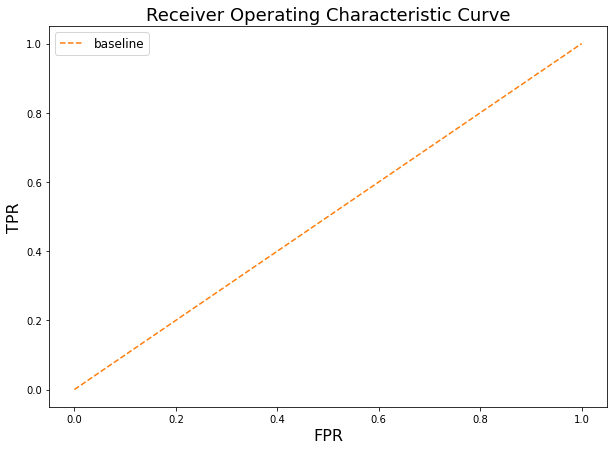

In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

models = []

models.append(('DT', DecisionTreeClassifier()))
#models.append(('RF', RandomForestClassifier()))
for name, model in models:
    
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    
    roc_values = []
    for thresh in np.linspace(0, 1, 100):
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        roc_values.append([tpr, fpr])
    tpr_values, fpr_values = zip(*roc_values)
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(fpr_values, tpr_values)
    ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
    plt.title('Receiver Operating Characteristic Curve', fontsize=18)
    plt.ylabel('TPR', fontsize=16)
    plt.xlabel('FPR', fontsize=16)
    plt.legend(fontsize=12);




to fix!

In [72]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 18
False Positives: 47
True Negatives: 126
False Negatives: 37


# DecisionTreeClassifier

In [47]:


dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=gini', accuracy_score(y_test, pred))
recall = recall_score(y_test, pred, average='binary')
print('recall: %.3f' % recall)
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=entropy', accuracy_score(y_test, pred))
recall = recall_score(y_test, pred, average='binary')
print('recall: %.3f' % recall)


Criterion=gini 0.6101694915254238
recall: 0.294
Criterion=entropy 0.6610169491525424
recall: 0.353


In [48]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(recall_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(recall_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

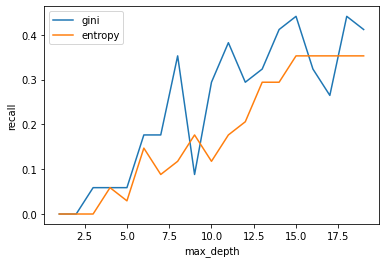

In [45]:
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.legend()
#parameters: targets to be predicted and predictions from new data used before

In [ ]:
#explain:

# visual tree:

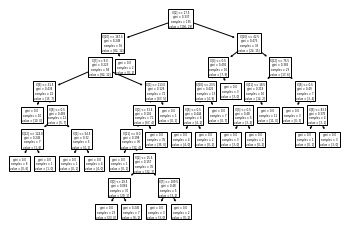

In [49]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=8)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
recall_score(y_test, pred)
from sklearn import tree
tree.plot_tree(dtree);

explore by depth

# RandomForestClassifier-to delete

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 40, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

predictionforest = model.best_estimator_.predict(x_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)

(266, 8)

(266,)

0.55

Criterion=gini 0.575
Criterion=entropy 0.525


0.6625